<a href="https://colab.research.google.com/github/ohalete/MSc_Project/blob/main/Copy_of_Untitled3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import matthews_corrcoef, roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
dataset = pd.read_csv("PIMA_DATASET.csv", index_col = 0)
#url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataset = pd.read_csv(url, names=names)
dataset.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
dataset.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
dataset.isnull()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [ ]:
dataset.sum()

preg      2953.000
plas     92847.000
pres     53073.000
skin     15772.000
test     61286.000
mass     24570.300
pedi       362.401
age      25529.000
class      268.000
dtype: float64

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
#CHECK FOR MISSING VALUES

# Split the dataset into features and target variable
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

In [ ]:
# Create a logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[139  20]
 [ 27  45]]


In [ ]:
# Assuming cm is the original confusion matrix with a total of 231 instances
# Calculate the scaling factor
scaling_factor = 230 / np.sum(cm)

# Scale down the values in the confusion matrix
scaled_cm = cm * scaling_factor

# Print the scaled confusion matrix
print("Scaled Confusion Matrix (230 instances):")
print(scaled_cm)

Scaled Confusion Matrix (230 instances):
[[138.3982684   19.91341991]
 [ 26.88311688  44.80519481]]


In [ ]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Accuracy:", accuracy*100)

Accuracy: 0.7965367965367965
Accuracy: 79.65367965367966


In [ ]:
acc_train = accuracy_score(y_train, model.predict(X_train))
acc_test = model.score(X_test, y_test)

print("Training Accuracy:", round(acc_train, 2))
print("Test Accuracy:", round(acc_test, 2))

Training Accuracy: 0.77
Test Accuracy: 0.8


In [ ]:
# Assuming cm is the confusion matrix

# Extract values from the confusion matrix
TN, FP, FN, TP = cm.ravel()

# Calculate error rates
FPR = FP / (FP + TN)
FNR = FN / (FN + TP)

# Print error rates
print("False Positive Rate (FPR):", FPR)
print("False Negative Rate (FNR):", FNR)

# Calculate TPR (Sensitivity or Recall)
TPR = TP / (TP + FN)

# Calculate TNR (Specificity)
TNR = TN / (TN + FP)

# Print TPR and TNR
print("True Positive Rate (TPR):", TPR)
print("True Negative Rate (TNR):", TNR)

False Positive Rate (FPR): 0.12578616352201258
False Negative Rate (FNR): 0.375
True Positive Rate (TPR): 0.625
True Negative Rate (TNR): 0.8742138364779874


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       159
           1       0.69      0.62      0.66        72

    accuracy                           0.80       231
   macro avg       0.76      0.75      0.76       231
weighted avg       0.79      0.80      0.79       231



In [ ]:
# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

# Calculate RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print("RMSE:", rmse)

# Calculate RAE
rae = mae / (abs(y_test - y_test.mean()).sum())
print("RAE:", rae)

# Calculate RRSE
rrse = (rmse ** 2) / (mse.sum())
print("RRSE:", rrse)

MAE: 0.20346320346320346
RMSE: 0.4510689564392605
RAE: 0.0020527603074772882
RRSE: 1.0


In [ ]:
# Predict probabilities for the test set
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Calculate MCC
mcc = matthews_corrcoef(y_test, np.round(y_pred_prob))
print("MCC:", mcc)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
print("ROC AUC:", roc_auc)

# Calculate PRC curve and AUC
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
prc_auc = auc(recall, precision)
print("PRC AUC:", prc_auc)

MCC: 0.5142102175820447
ROC AUC: 0.8430293501048218
PRC AUC: 0.6943006391986639


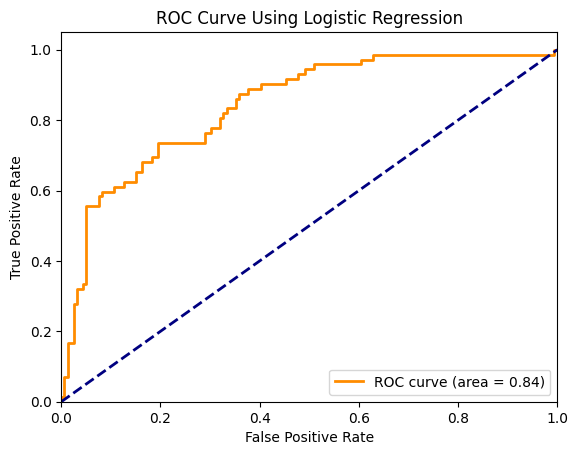

In [ ]:
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Receiver Operating Characteristic')
plt.title('ROC Curve Using Logistic Regression')
plt.legend(loc="lower right")
plt.savefig("Logistic_reg_ROC.jpg")
plt.show()

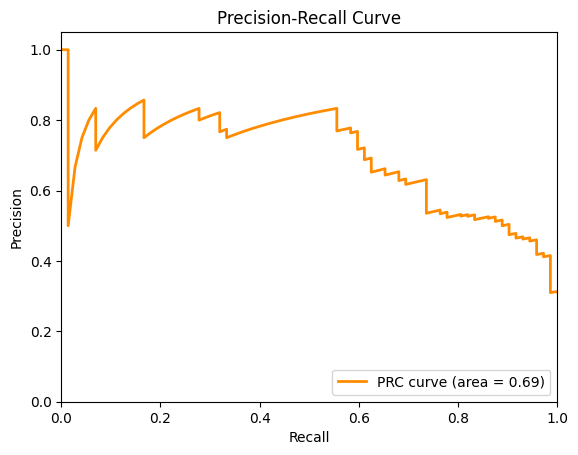

In [ ]:
# Plot PRC curve
plt.figure()
plt.plot(recall, precision, color='darkorange', lw=2, label='PRC curve (area = %0.2f)' % prc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
tn, fp, fn, tp = cm.ravel()

In [ ]:
tn0, fp0, fn0, tp0 = cm.ravel()  # Class 0
tn1, fp1, fn1, tp1 = cm.ravel()[::-1]  # Class 1

In [ ]:
tp_rate0 = tp0 / (tp0 + fn0)
fp_rate0 = fp0 / (fp0 + tn0)

tp_rate1 = tp1 / (tp1 + fn1)
fp_rate1 = fp1 / (fp1 + tn1)

In [ ]:
print("tp_rate0:", tp_rate0)
print("tp_rate1:", tp_rate1)

print("fp_rate0:", fp_rate0)
print("fp_rate1:", fp_rate1)

tp_rate0: 0.625
tp_rate1: 0.8742138364779874
fp_rate0: 0.12578616352201258
fp_rate1: 0.375


In [ ]:
weighted_tp = tp * 0.7
weighted_fp = fp * 0.3

In [ ]:
weighted_tp_rate = (tp_rate0 + tp_rate1)/2
print("weighted_tp_rate:", weighted_tp_rate)

weighted_fp_rate = (fp_rate0 + fp_rate1)/2
print("weighted_fp_rate:", weighted_fp_rate)

weighted_tp_rate: 0.7496069182389937
weighted_fp_rate: 0.2503930817610063


In [ ]:
weighted_tp_rate = weighted_tp / (weighted_tp + fn)
weighted_fp_rate = weighted_fp / (weighted_fp + tn)

In [ ]:
print("weighted_tp_rate:", weighted_tp_rate)
print("weighted_fp_rate:", weighted_fp_rate)

weighted_tp_rate: 0.5384615384615384
weighted_fp_rate: 0.041379310344827586
